In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import scipy.misc
import matplotlib.cm as cm
import random
from PIL import Image
from scipy.special import expit


# Multi-class Classification
## Dataset

In [11]:
datafile = 'ex3data1.mat'
mat = scipy.io.loadmat(datafile)
X, y = mat['X'], mat['y']
X.shape, y.shape

((5000, 400), (5000, 1))

In [12]:
X = np.insert(X, 0, 1, axis=1)
X.shape

(5000, 401)

## Visualizing the data

In [36]:
def getImg(row):
    width, height = 20, 20
    square = row[1:].reshape(width, height)
    return square.T
def displayImg(indices_to_display = None):
    width, height = 20, 20
    nrows, ncols = 10, 10
    if incorrect_indices == None:
        indices_to_display = random.sample(range(X.shape[0]), nrows * ncols)
    big_picture = np.zeros((height * nrows, width * ncols))
    irow , icol = 0, 0
    for idx in indices_to_display:
        if icol == ncols:
            irow += 1
            icol = 0
        iimg = getImg(X[idx])
        big_picture[(irow * height):(irow * height + iimg.shape[0]),
                   (icol * width):(icol * width +iimg.shape[1])] = iimg
        icol += 1
    fig = plt.figure(figsize=(6, 6))
    plt.imshow(big_picture,interpolation='nearest')

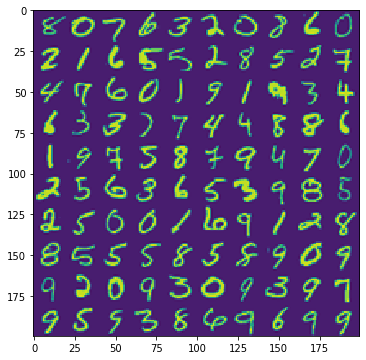

In [14]:
displayImg()

## Vectorizing logistic regression

In [15]:
def computeH(theta, X):
    #expit(z) = 1/(1 + exp(-z))
    return expit(X @ theta)

In [16]:
def computeCost(theta, X, y, lam = 0.):
    m = X.shape[0] # 5000
    h = computeH(theta, X) # shape: (5000, 1)
    term1 = np.log(h) @ -y.T # shape : (5000, 5000)
    term2 = np.log(1 - h) @ (1 - y.T) # shape: (5000, 5000)
    left = (term1 - term2) / m # shape: (5000, 5000)
    right = theta.T @ theta * lam / (2 * m) # shape: (1, 1)
    return left + right # shape: (5000, 5000)

## Compute theta

In [21]:
def computeGraident(theta, X, y, lam = 0.):
    m = X.shape[0]
    beta = computeH(theta, X) - y.T # (5000, 5000)
    regterm = theta[1:] * lam / m #shape : (400, 1)
    grad = (1. / m) * (X.T @ beta) # (401, 5000)
    grad[1:] = grad[1:] + regterm
    return grad # shape: (501, 5000)

In [18]:
from scipy import optimize

def optimizeTheta(theta, X, y, lam = 0.):
    result = optimize.fmin_cg(computeCost,
                             fprime=computeGraident,
                             x0=theta,
                             args=(X, y, lam),
                             maxiter=50,
                             disp=False,
                             full_output=True)
    return (result[0], result[1])


In [19]:
def buildTheta():
    lam = 0.
    init_theta = np.zeros((X.shape[1], 1)).reshape(-1) #(1, 401)
    theta = np.zeros((10, X.shape[1])) # (10, 401)
    for i in range(10):
        iclass = i if i else 10
        print("Optimizing for handwritten number %d..." % i)
        logic_Y = np.array([1 if x == iclass else 0 for x in y])
        itheta, iminccost = optimizeTheta(init_theta, X, logic_Y, lam)
        theta[i, :] = itheta
    print("Done!")
    return theta


In [22]:
theta = buildTheta()

Optimizing for handwritten number 0...
Optimizing for handwritten number 1...
Optimizing for handwritten number 2...
Optimizing for handwritten number 3...
Optimizing for handwritten number 4...
Optimizing for handwritten number 5...
Optimizing for handwritten number 6...
Optimizing for handwritten number 7...
Optimizing for handwritten number 8...
Optimizing for handwritten number 9...
Done!


## One-vs-all classification

In [32]:
def predictOneVsAll(theta, row):
    classes = [10] 
    for i in range(1, 10):
        classes.append(i)
    hypots = [0] * len(classes)
    for i in range(len(hypots)):
        hypots[i] = computeH(theta[i], row)
    return classes[np.argmax(np.array(hypots))]

In [35]:
n_correct, n_total = 0, 0
incorrect_indices = []
for i in range(X.shape[0]):
    n_total += 1.
    if predictOneVsAll(theta, X[i]) == y[i]:
        n_correct += 1
    else:
        incorrect_indices.append(i)
print("Training set accuracy: %0.1f%%" % (100 * (n_correct / n_total)))


Training set accuracy: 95.4%


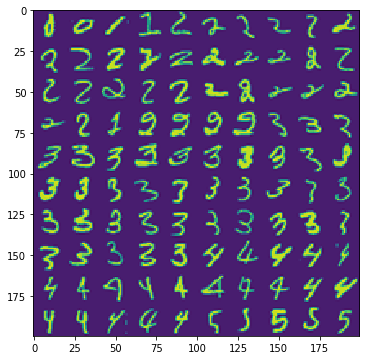

In [37]:
displayImg(incorrect_indices[:100])

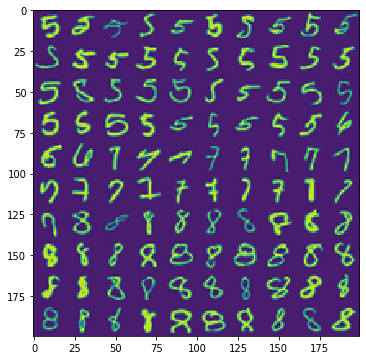

In [38]:
displayImg(incorrect_indices[100:200])

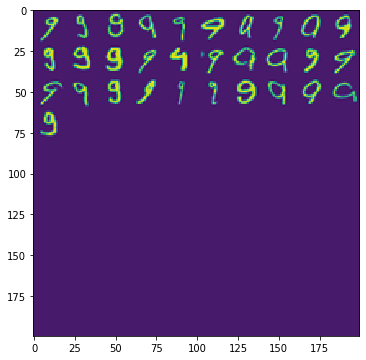

In [39]:
displayImg(incorrect_indices[200:300])

# Neural Networks

## Dataset

In [41]:
datafile2 = 'ex3weights.mat'
mat = scipy.io.loadmat(datafile2)
Theta1, Theta2 = mat['Theta1'], mat['Theta2']
Theta1.shape, Theta2.shape

((25, 401), (10, 26))

## Feedforward Propagation

In [42]:
def propagateForward(row, thetas):
    features = row
    for i in range(len(thetas)):
        theta = thetas[i]
        z = theta @ features
        a = expit(z)
        if i == len(thetas) - 1:
            return a
        a = np.insert(a, 0, 1) # Add the bias unit
        features = a

In [43]:
def predictNN(row, thetas):
    classes = list(range(1, 11))
    output = propagateForward(row, thetas)
    return classes[np.argmax(np.array(output))]


In [45]:
theta2 = [Theta1, Theta2]
n_correct2, n_total2 = 0, 0
incorrect_indices2 = []

for i in range(X.shape[0]):
    n_total2 += 1
    if predictNN(X[i], theta2) == int(y[i]):
        n_correct2 += 1
    else:
        incorrect_indices2.append(i)
print("Training set accuracy: %0.1f%%" % (100 * (n_correct2 / n_total2)))

Training set accuracy: 97.5%


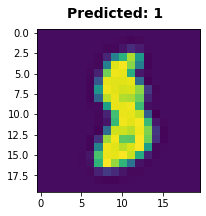

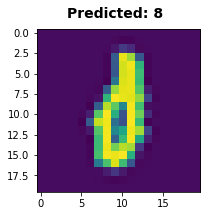

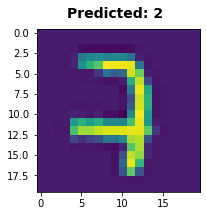

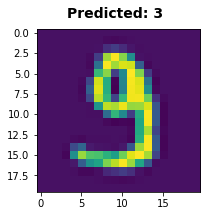

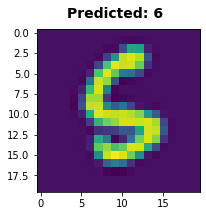

In [47]:
for x in range(5):
    i = random.choice(incorrect_indices2)
    fig = plt.figure(figsize=(3, 3))
    plt.imshow(getImg(X[i]),interpolation='nearest')
    predicted_val = predictNN(X[i], theta2)
    predicted_val = 0 if predicted_val == 10 else predicted_val
    fig.suptitle("Predicted: %d" % predicted_val, fontsize=14, fontweight="bold")